# Integración numérica de ODEs

En este práctico introduciremos los métodos de **Euler** y de **RK4** (Runge-Kutta de orden 4) de integración numérica de Ecuaciones Diferenciales Ordinarias (ODEs).

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Integrador de **Euler**

### Ecuaciones Diferenciales Ordinarias (ODEs)

El comportamiento de un sistema dinámico se suele describir en términos de trayectorias. Una trayectoria es una función del tiempo 

\begin{eqnarray}
x:\mathbb{R}\ni t\to x(t)\in X
\end{eqnarray}

en donde $x(t)\in X$ representa el estado que exhibe el sistema al tiempo $t$ y $X$ es un espacio vectorial.
Típicamente, $X=\mathbb{R}^n$.

Las trayectorias de un sistema dinámico suelen ser soluciones de una ecuación diferencial.
Nosotros, nos enfocaremos en sistemas dinámicos caracterizados por Ecuaciones Diferenciales Ordinarias (ODEs).

Decimos que una trayectoria $x:t\to x(t)$ es su solución de una ODE caracterizada por una función 

\begin{eqnarray}
f: X,\mathbb{R} \ni x,t \to f(x,t) \in X
\end{eqnarray}

cuando

\begin{eqnarray}
x'(t) = f(x(t),t)
\end{eqnarray}

para todo tiempo $t$ perteneciente a algún intervalo de tiempo $ T\subseteq \mathbb{R}$. Aquí, $x'(t)$ es la derivada con respecto al tiempo $t$ de la función $x:t\to x(t)$ que representa la trayectoria.

En una ODE, una trayectoria particular $x$ queda unívocamente determinada por el valor de $x(t)$ en algún tiempo específico. Típicamente, se considera una *condición incial* $x(a)$, y nos interesa computar el valor de $x(t)$ para todo $t\in [a,b]$, i.e. conocer la trayectoria para todo tiempo entre un tiempo incial $a$ y un tiempo final $b$.

### Métodos de integración numérica de ODEs

Los métodos de integración de sistemas de Ecuaciones Diferenciales Ordinarias (ODEs) consisten, básicamente, de dos partes.

* Un método de extrapolación que permita aproximar **un paso de integración**, i.e. aproximar $x(t+h)$ a partir de conocer $t$, $x(t)$ y $f$ para valores de $h\in \mathbb{R}$ suficientementes pequeños.

* Un **integrador** de sucesivas aproximaciones $w_0$, $w_1$, ..., $w_k$ de los valores $x(a)$, $x(a+h)$, $x(a+2h)$, ..., $x(a+kh)=x(b)$ computadas secuencialmente a partir de un valor incial $w_0=x(a)$.

Existen varios métodos de aproximar un paso de integración.
En cambio, el integrador suele ser común a los diferentes métodos.

### Método de Euler

El método de Euler es, quizás, el más simple que existe.
Esencialmente, consiste en aproximar de $x(t+h)$ utilizando $f(x,t)$ para calcular la extrapolación lineal 

\begin{eqnarray}
x(t+h) 
&=& 
x(t) + x'(t)h + x''(t)\frac{h^2}{2} + ...
\\
&\approx & 
x(t) + x'(t)h
\\
&=&
x(t) + f(x(t),t)h
\end{eqnarray}

para un valor de $h$ que sea relativamente pequeño.

### Integrador

Si $t_0,t_1,...,t_n$ son valores equiespaciados en el intervalo de tiempo $[a,b]$, entonces $t_j=a+jh$ para $j\in \{0,1,2,...,n\}$ con $t_n=b$ y $h=(b-a)/n$.
Luego, utilizando el método $m$ proveido por el usuario, se computan sucesivamente las aproximaciones

\begin{eqnarray}
w_{j} &=& m(f,w_{j-1},t_{j-1},h)
\end{eqnarray}

de los valores $x(t+jh)$ para $j=1,...,n$, partiendo de la condición inicial $w_0=x(t_0)=x(a)$.

Por ejemplo, si el método proveido es el de Euler, las aproximaciones adoptan la forma

\begin{eqnarray}
w_{j} &=& w_{j-1} + f(w_{j-1},t_{j-1})h
\end{eqnarray}

**a)** Implemente una función de Python llamada `euler` que compute un paso de integración según el método de **Euler**. 
Dicha función debe tomar como argumentos:

* La función $f:\mathbb{R}^n,\mathbb{R} \to \mathbb{R}^n$ que caracterize el lado derecho de la ODE.

* Un valor de $x \in \mathbb{R}^n$.

* Un valor de $t \in \mathbb{R}$.

* El paso de integración $h \in \mathbb{R}$.

* Un vector de parámetros $p \in \mathbb{R}^m$.

La función  `euler` debe retornar el lado derecho de la aproximación $x(t+h)\approx x(t) + f(x(t),t)h$.

**b)** Implemente una función de Python llamada `integrador_ode` que integre el cómputo de sucesivos pasos de integración.
Dicha función debe tomar como argumentos:

* Una función `m` que aproxime el paso de integración (ej. `euler`).

* La función $f:\mathbb{R}^n,\mathbb{R} \to \mathbb{R}^n$.

* La condición inicial $x_0=x(a)\in \mathbb{R}^n$.

* El tiempo inciial $a\in \mathbb{R}$.

* El tiempo final $b\in \mathbb{R}$.

* El número $k\in \mathbb{N}$ de pasos de integración.

* Un vector de parámetros $p \in \mathbb{R}^m$.

* Y, opcionalmente, una *función condicionante* 
\begin{eqnarray}
c:\mathbb{R}^n,\mathbb{R},\mathbb{R}^m\ni x(t),t,p \to c(x(t),t,p)\in \mathbb{R}^n
\end{eqnarray}
que permita intervenir en el cómputo de la trayectoria cuando se desee.
Veremos más adelante para que sirve esta función condicionante.

In [ ]:
def f(x):                  ### Creando una funcion
  return np.sin(x)

In [ ]:
f(np.pi)

1.2246467991473532e-16

In [2]:
# a) Euler
def Euler(f,x0,t0,h,p):
  return x0 + h*f(t0, x0, p)

In [3]:
# b) Integrador
def iteracion_ODE(Metodo,f,x0,a,b,N,p):
    t = np.zeros(N+1)
    w = np.zeros(N+1)
    h = (b-a)/(N)
    t[0] = a
    w[0] = x0
    for i in range(1,N+1):
        t[i] = t[i-1]+h
        w[i] = Metodo(f,w[i-1],t[i-1],h,p)
    return t[:],w[:]

In [ ]:
(b-a)/(N),(b-a)/(N-1)

(0.1, 0.1111111111111111)

In [ ]:
 for i in range(1,N):
   print(i)

1
2
3
4
5
6
7
8
9


In [ ]:
for j in range(N): 
  print(j)

0
1
2
3
4
5
6
7
8
9


In [ ]:
#Ejemplo
def f(t,y,p):
  return -y+np.sin(2*np.pi*t)
a = 0
b = 1
x0 = 1.0
N = 10          ### h=0,1
p = 0

In [ ]:
t,x = iteracion_ODE(Euler,f,x0,a,b,N,p)

In [ ]:
t,x

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 0.9       , 0.86877853, 0.87700632, 0.88441134,
        0.85474873, 0.76927386, 0.63356795, 0.4751055 , 0.3324893 ,
        0.24046185]))

Text(0.5, 1.0, 'Ejemplo')

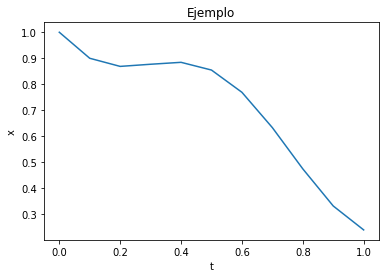

In [ ]:
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Ejemplo')

In [ ]:
# 2.b)
def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros, 
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)    
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores 
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial
    
    for j in range(k):    #Aca se produce la iteración en j 
        
        t[j+1] = t[j] + h                # iteracion tiempo 
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w 
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

In [ ]:
def f(t,y,p):
  return -y+np.sin(2*np.pi*t)
a = 0
b = 1
x0 = [1.0]
N = 10          ### h=0,1
p = 0

In [ ]:
t,x= integrador_ode(Euler,f,x0,a,b,N,p,c=lambda x,t,p:x)

In [ ]:
t,x

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([[1.        , 0.9       , 0.86877853, 0.87700632, 0.88441134,
         0.85474873, 0.76927386, 0.63356795, 0.4751055 , 0.3324893 ,
         0.24046185]]))

In [ ]:
len(t),x.shape

(11, (1, 11))

In [ ]:
x[0]

array([1.        , 0.9       , 0.86877853, 0.87700632, 0.88441134,
       0.85474873, 0.76927386, 0.63356795, 0.4751055 , 0.3324893 ,
       0.24046185])

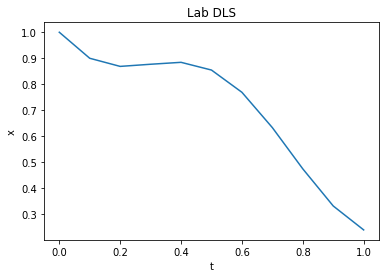

In [ ]:
plt.plot(t,x[0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Lab DLS')
plt.show()

## **Ejercicio 3)** Crecimiento exponencial

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
qx(t)
\end{eqnarray}

donde $q$ es una constante positiva.

**a)** Utilice el integrador ODE implementado en el ejercicio 2) para integrar la ODE arriba definida, a partir de la condición inicial $x(t=0)=1$ hasta el tiempo $t=3$, y para $q=1$. Utilice el paso de integración $h=0.1$.

**b)** Grafique la solución numérica computada en el inciso anterior. Incluya en el gráfico la solución exacta que se deriva a continuación

\begin{eqnarray}
x'(t)
&=&
qx(t)
\\
\frac{dx}{dt}
&=&
qx
\\
\frac{dx}{x}
&=&
qdt
\\
\int_{x(0)}^{x(\tau)}
\frac{dx}{x}
&=&
q
\int_0^{\tau} dt
\\
\ln(x(\tau))-\ln(x(0))
&=&
q\tau
\\
\ln(x(t))
&=&
qt
+
\ln(x(0))
\\
x(t)
&=&
e^{
qt
+
\ln(x(0))
}
\\
x(t)
&=&
e^{\ln(x(0))}
e^{qt}
\\
x(t)
&=&
x(0)
e^{qt}
\end{eqnarray}

**c)** Repita para $h=0.01$.

In [ ]:
# a)

In [ ]:
# Solucion exacta
def f_exacta(t,q):
  return x0*np.exp(q*t)

In [ ]:
def f(t,x,p):
  return p*x
a = 0
b = 3
x0 = 1.0
h = 0.1          ### h=0,1
N = int((b-a)/h)
q = 1.
p = q
N

30

In [ ]:
t,x = iteracion_ODE(Euler,f,x0,a,b,N,p)

In [ ]:
t,x

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. ]),
 array([ 1.        ,  1.1       ,  1.21      ,  1.331     ,  1.4641    ,
         1.61051   ,  1.771561  ,  1.9487171 ,  2.14358881,  2.35794769,
         2.59374246,  2.85311671,  3.13842838,  3.45227121,  3.79749834,
         4.17724817,  4.59497299,  5.05447028,  5.55991731,  6.11590904,
         6.72749995,  7.40024994,  8.14027494,  8.95430243,  9.84973268,
        10.83470594, 11.91817654, 13.10999419, 14.42099361, 15.86309297,
        17.44940227]))

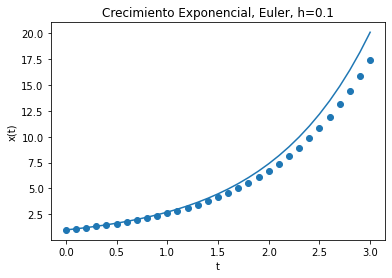

In [ ]:
plt.scatter(t,x)
plt.plot(t,f_exacta(t,q))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Crecimiento Exponencial, Euler, h=0.1')
plt.show()

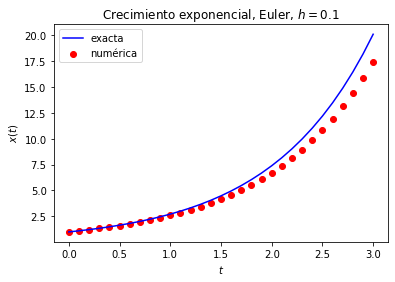

In [ ]:
# b)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x,label="numérica",linestyle='-',c='red')
plt.plot(t,np.exp(q*t),label="exacta",linestyle='-',c='blue')
plt.title('Crecimiento exponencial, Euler, $h=0.1$')
plt.legend()

In [ ]:
def f(t,x,p):
  return p*x
a = 0
b = 3
x0 = [1.0]
h = 0.1          ### h=0,1
N = int((b-a)/h)
q = 1.
p = q
N

30

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

In [ ]:
t,x

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. ]),
 array([[ 1.        ,  1.1       ,  1.21      ,  1.331     ,  1.4641    ,
          1.61051   ,  1.771561  ,  1.9487171 ,  2.14358881,  2.35794769,
          2.59374246,  2.85311671,  3.13842838,  3.45227121,  3.79749834,
          4.17724817,  4.59497299,  5.05447028,  5.55991731,  6.11590904,
          6.72749995,  7.40024994,  8.14027494,  8.95430243,  9.84973268,
         10.83470594, 11.91817654, 13.10999419, 14.42099361, 15.86309297,
         17.44940227]]))

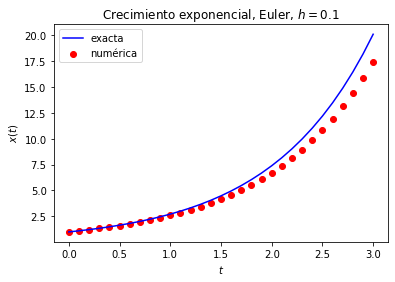

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,q),label="exacta",linestyle='-',c='blue')
plt.title('Crecimiento exponencial, Euler, $h=0.1$')
plt.legend()

In [ ]:
# c)

In [ ]:
def f(t,x,p):
  return p*x
a = 0
b = 3
x0 = 1.0
h = 0.01          ### h=0,1
N = int((b-a)/h)
q = 1.
p = q
N

300

In [ ]:
t,x = iteracion_ODE(Euler,f,x0,a,b,N,p)

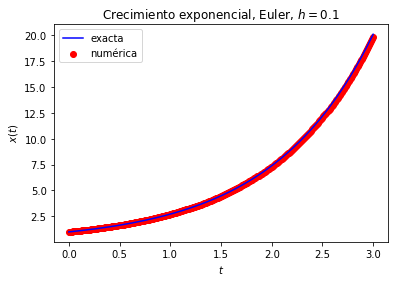

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x,label="numérica",linestyle='-',c='red')
plt.plot(t,np.exp(q*t),label="exacta",linestyle='-',c='blue')
plt.title('Crecimiento exponencial, Euler, $h=0.1$')
plt.legend()

## **Ejercicio 4)** Decaimiento exponencial

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
-qx(t)+r
\end{eqnarray}

donde $q$ es una constante positiva y $r$ es una constante arbitraria.

**a)** Use el integrador ODE con el método de Euler para encontrar una aproximación numérica de la ODE arriba especificada.
Considere la condición inicial $x(0)=3$ e integre hasta $t=3$.
Utilice el paso de integración $h=0.1$ y los valores de los parámetros $q=2$ y $r=3$.

**b)** Grafique la trayectoria computada en el inciso anterior y, con el fin de comparar, grafique simultaneamente la correspondiente solución analítica derivada a continuación

\begin{eqnarray}
\frac{dx}{dt}
&=&
-qx+r
\\
-\frac{1}{q}\frac{du}{dt}
&=&
u,
\;\;\;\;
\;\;\;\;
\;\;\;\;
u=-qx+r
\\
\frac{du}{dt}
&=&
-qu
\\
u(t)
&=&
u(0)e^{-qt}
\\
-qx(t)+r
&=&
(-qx(0)+r)e^{-qt}
\\
x(t)
&=&
(x(0)-r/q)e^{-qt}+r/q
\end{eqnarray}

**c)** Repita para $h=0.01$.

**d)** Repita para $x(0)=1$.

In [ ]:
# a)

In [ ]:
# Solucion exacta
def f_exacta(t,p):
  return (x0 - p[1]/p[0])*np.exp(-p[0]*t) + p[1]/p[0]

In [ ]:
def f(t,x,p):
  return -p[0]*x + p[1]
a = 0
b = 3
x0 = [3.0]
h = 0.1          ### h=0,1
N = int((b-a)/h)
q = 2.0
r = 3.0
p = np.array([q,r])
N

30

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

In [ ]:
# b)

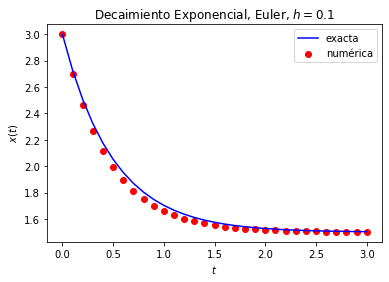

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,p),label="exacta",linestyle='-',c='blue')
plt.title('Decaimiento Exponencial, Euler, $h=0.1$')
plt.legend()

In [ ]:
# c)

In [ ]:
def f(t,x,p):
  return -p[0]*x + p[1]
a = 0
b = 3
x0 = [3.0]
h = 0.01          ### h=0,1
N = int((b-a)/h)
q = 2.0
r = 3.0
p = np.array([q,r])
N

300

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

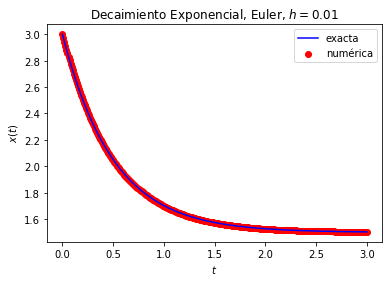

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,p),label="exacta",linestyle='-',c='blue')
plt.title('Decaimiento Exponencial, Euler, $h=0.01$')
plt.legend()

In [ ]:
# d)

In [ ]:
def f(t,x,p):
  return -p[0]*x + p[1]
a = 0
b = 3
x0 = [1.0]
h = 0.01          ### h=0,1
N = int((b-a)/h)
q = 2.0
r = 3.0
p = np.array([q,r])
N

300

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

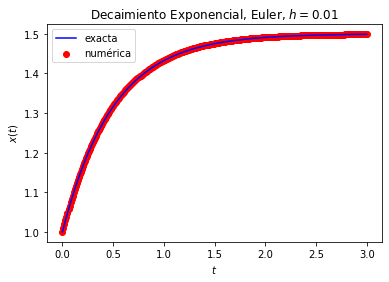

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,p),label="exacta",linestyle='-',c='blue')
plt.title('Decaimiento Exponencial, Euler, $h=0.01$')
plt.legend()

## **Ejercicio 5)** Ecuación Logística

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
rx(t)(1-x/K)
\end{eqnarray}

**a)** Integre numéricamente la anterior ODE utilizando el método de Euler, la condición inicial $x(0)=0.1$, hasta $t=5$, utilizando un paso de integración $h=0.1$, una tasa de reproducción $r=1$ y una capacidad de carga $K=1$.

**b)** Grafique la solución computada en el inciso anterior, comparandola con la solución analítica que se deriva a continuación

\begin{eqnarray}
\frac{dx}{dt}
&=&
rx(1-x/K)
\\
\frac{dx}{x(1-x/K)}
&=&
rdt
\\
\int_{x(0)}^{x(t)}\frac{dx}{x(1-x/K)}
&=&
rt
\\
\int_{x(0)}^{x(t)}dx\,\frac{1}{x}+\frac{1}{K-x}
&=&
rt
\\
\ln(x(t))-\ln(x(0))
-
\ln(K-x(t))
+
\ln(K-x(0))
&=&
rt
\\
\ln\frac{x(t)}{K-x(t)}
&=&
rt
+
\ln\frac{x(0)}{K-x(0)}
\\
\frac{x(t)}{K-x(t)}
&=&
f(t)
=
\frac{x(0)}{K-x(0)}e^{rt}
\\
x(t)
&=&
(K-x(t))f(t)
\\
x(t)(1+f(t))
&=&
Kf(t)
\\
x(t)
&=&
K\frac{f(t)}{1+f(t)}
=
K\frac{1}{1+\frac{1}{f(t)}}
\\
x(t)
&=&
K\left(1+\frac{K-x(0)}{x(0)}e^{-rt}\right)^{-1}
\end{eqnarray}

**c)** Repita para $x(0)=1.5$.

In [ ]:
# Solucion exacta
def f_exacta(t,x0,p):
  return p[0]*(1+(p[0]-x0[0])/x0[0]*np.exp(-p[1]*t))**(-1)

In [ ]:
# a)

In [ ]:
def f(t,x,p):
  return p[1]*x*(1-x/p[0])
a = 0
b = 5
x0 = [0.1]
h = 0.1          ### h=0,1
N = int((b-a)/h)
k = 1.
r = 1.
p = np.array([k,r])
N

50

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

In [ ]:
# b)

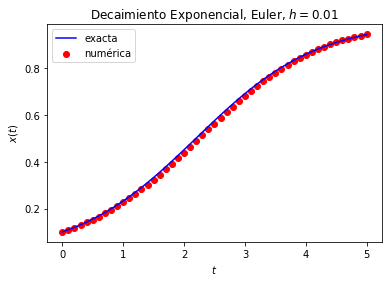

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,x0,p),label="exacta",linestyle='-',c='blue')
plt.title('Decaimiento Exponencial, Euler, $h=0.01$')
plt.legend()

In [ ]:
# c)

In [ ]:
x0 = plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,x0,p),label="exacta",linestyle='-',c='blue')
plt.title('Decaimiento Exponencial, Euler, $h=0.01$')
plt.legend()[1.5]
h = 0.1          ### h=0,1
N = int((b-a)/h)
k = 1.
r = 1.
p = np.array([k,r])
N

50

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

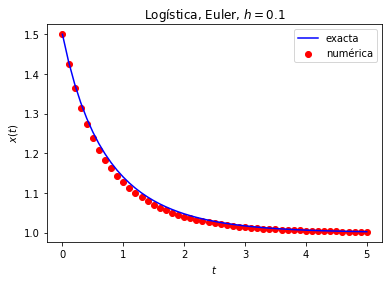

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="numérica",linestyle='-',c='red')
plt.plot(t,f_exacta(t,x0,p),label="exacta",linestyle='-',c='blue')
plt.title('Logística, Euler, $h=0.1$')
plt.legend()

## **Ejercicio 6)** Oscilador armónico

### Redución del orden de una ODE

En general, una ODE tiene la siguiente forma

\begin{eqnarray}
y^{(n)}(t) 
&=&
f(y(t),y'(t),y''(t),...,y^{(n-1)}(t),t)
\;\;\;\; (1)
\end{eqnarray}

donde $y^{(i)}$ denota la $i$-ésima derivada de $y$ respecto a $t$.
Dicha ODE es de dimensión $d$ si $x:\mathbb{R}\ni t\to y(t)\in \mathbb{R}^d$.
Además, se dice que es de orden $n$ porque involucra derivadas de $x$ de hasta orden $n$.

Una ODE de orden $n$ y dimensión $d$ como la de la ecuación $(1)$ siempre puede reducirse a una ODE de primero orden y dimensión $nd$ utilizando la siguiente transformación

\begin{eqnarray}
x_1:t\to x_1(t) &:=& y(t) \\
x_2:t\to x_2(t) &:=& y'(t) \\
x_3:t\to x_3(t) &:=& y''(t) \\
&...& \\
x_n:t\to x_n(t) &:=& y^{(n-1)}(t) \\
x_n':t\to x_n'(t) &=& y^{(n)}(t)
\end{eqnarray}

de manera que la ecuación $(1)$ adopte la forma

\begin{eqnarray}
x_{1}'(t) &=& x_2(t) \\
x_{2}'(t) &=& x_3(t) \\
&...& \\
x_{n-1}'(t) &=& x_n(t) \\
x_n'(t) &=& f(x_1(t),x_2(t),x_3(t),...,x_{n}(t),t)
\end{eqnarray}

### El oscilador armónico

El oscilador armónico viene descripto por la siguiente ecuación diferencial ordinaria (ODE)

\begin{eqnarray}
y''(t) &=& -ay(t)
\end{eqnarray}

Esta es una ODE de segundo orden, ya que aparece la derivada segunda de la función $x:t\to x(t)$.
La convertimos a una de primer orden definiendo $x_1=y$ y $x_2=y'$, obteniéndose

\begin{eqnarray}
x_1'(t) &=& x_2(t) \\
x_2'(t) &=& -\alpha x_1(t)
\end{eqnarray}

**a)** Utilice lo implementado en el ejecicio 2) para resolver en el intervalo de tiempo $[a,b]=[0,10]$ la ODE del oscilador armónico sujeto a las siguientes condiciones iniciales

\begin{eqnarray}
x_1(a) &=& y(a) = 1 \\
x_2(a) &=& y'(a) = 0
\end{eqnarray}

para $\alpha=3$ y usando un paso de integración $h=0.1$.

**b)** Grafique $x_1(t)$ vs $t$ y $x_2(t)$ vs $t$. No olvide agregar leyendas a los ejes y las curvas.
Use `np.scatter()` en vez de `np.plot()` para graficar usando puntos en vez de curvas.

**c)** Grafique $x_2(t)$ vs $x_1(t)$ paramétricamente en función de $t$.

In [ ]:
# a)

In [ ]:
def f(t,x,p):
  return np.array([x[1],-p[0]*x[0]])           ### x'1(t) = x2(t)
a = 0                                          ### x'2(t) = -p[0]*x1(t)
b = 10
x0 = [1.,0]
h = 0.1          ### h=0,1
N = int((b-a)/h)
alfa = 3.
p = np.array([alfa])
N

100

In [ ]:
t,x = integrador_ode(Euler,f,x0,a,b,N,p)

In [ ]:
t,x

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. ]),
 array([[ 1.        ,  1.        ,  0.97      ,  0.91      ,  0.8209    ,
          0.7045    ,  0.563473  ,  0.401311  ,  0.22224481,  0.03113929,
         -0.16663357, -0.36534062, -0.55904865, -0.74179647, -0.90777283,
         -1.05149529, -1.16798457, -1.25292899, -1.30283387, -1.31515089,
         -1.2883

In [ ]:
# b)

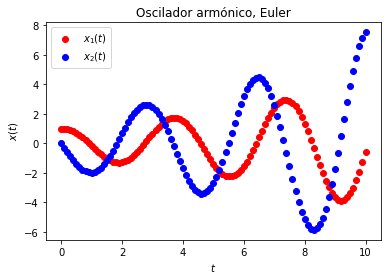

In [ ]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="$x_1(t)$",linestyle='-',c='red')
plt.scatter(t,x[1],label="$x_2(t)$",linestyle='-',c='blue')
#plt.plot(t,f_exacta(t,x0,p),label="exacta",linestyle='-',c='blue')
plt.title('Oscilador armónico, Euler')
plt.legend()

In [ ]:
# c)

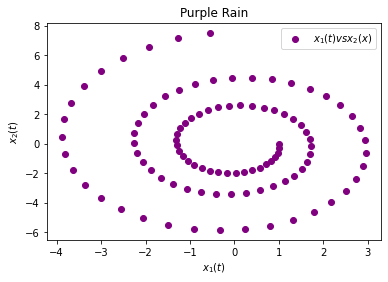

In [ ]:
plt.xlabel('$x_1(t)$')
plt.ylabel('$x_2(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(x[0,:],x[1,:],label="$x_1(t) vs x_2(x)$",linestyle='-',c='purple')
plt.title('Purple Rain')
plt.legend()

## **Ejercicio 7)** Integrador de **RK4**

El método de Runge-Kutta de orden 4 utiliza la teoría de diferencias finitas para calcular la siguiente aproximación de orden 4ta de un paso de integración

A saber
\begin{eqnarray}
x(t+h)
&=&
x(t) 
+ 
\frac{h}{6}
(k_1+2k_2+2k_3+k_4)
+
\mathcal{O}(h^5)
\end{eqnarray}

donde

\begin{eqnarray}
k_1 &=& f(x,t) \\
k_2 &=& f(x+hk_1/2,t+h/2) \\
k_3 &=& f(x+hk_2/2,t+h/2) \\
k_4 &=& f(x+hk_3,t+h)
\end{eqnarray}

**a)** Implemente el método de RK4.

**b)** Repita el ejercicio **6)** pero usando **RK4** en vez de **Euler**.

**c)** Nota alguna diferencia al comparar la solución obtenida con Euler y la solución obtenida con RK4?

In [4]:
def iteracion_ODE_multidimencional(Metodo,f,y0,a,b,N,p):
    t = np.zeros(N+1)
    w = np.zeros((len(y0),N+1))
    h = (b-a)/(N)
    t[0] = a
    w[:,0] = y0
    for i in range(1,N+1):
        t[i] = t[i-1]+h
        w[:,i] = Metodo(f,t[i-1],w[:,i-1],h,p)
    return t[:],w[:,:]condición inicial x(0)=3 e integre hasta t=3. Utilice el paso de integración h=0.1 y los valores de los parámetros q=2 y r=3.

In [ ]:
# a)

In [5]:
"1er paso metodo Runge-Kutta 4"
def RK4(f,t0,y0,h,p):
    k1 = f(t0, y0, p)
    k2 = f(t0+h/2, y0+h/2*k1, p)
    k3 = f(t0+h/2, y0+h/2*k2, p)
    k4 = f(t0+h, y0+h*k3, p)
    return y0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)      ### y0 + h/6(k1 + 2*k2 + 2*k3 + k4) No anda

In [ ]:
# b)

In [6]:
def f(t,x,p):
  return np.array([x[1],-p[0]*x[0]])           ### x'1(t) = x2(t)
a = 0                                          ### x'2(t) = -p[0]*x1(t)
b = 10
x0 = [1.,0]
h = 0.1          ### h=0,1
N = int((b-a)/h)
alfa = 3.
p = np.array([alfa])
N

100

In [7]:
t,x = iteracion_ODE_multidimencional(RK4,f,x0,a,b,N,p)

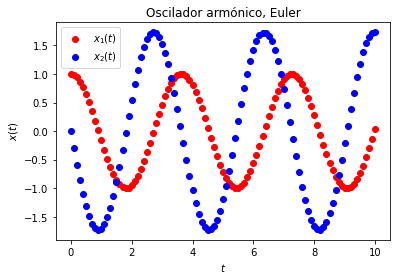

In [8]:
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,x[0],label="$x_1(t)$",linestyle='-',c='red')
plt.scatter(t,x[1],label="$x_2(t)$",linestyle='-',c='blue')
#plt.plot(t,f_exacta(t,x0,p),label="exacta",linestyle='-',c='blue')
plt.title('Oscilador armónico, Euler')
plt.legend()

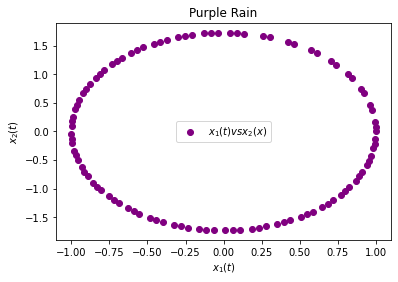

In [11]:
plt.xlabel('$x_1(t)$')
plt.ylabel('$x_2(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(x[0,:],x[1,:],label="$x_1(t) vs x_2(x)$",linestyle='-',c='purple')
plt.title('Purple Rain')
plt.legend()

In [ ]:
# c)

In [ ]:
# Con Euler se percibe la solucion como un coseno con una amplitud creciente con el tiempo
#           se van sumando errores de integracion por cada iteracion
# Con RK4 se percibe la solucion como un coseno

## **Ejercicio 8)** Creando una "libreria" de integradores ODE

**a)** Exporte el actual notebook `redes-neuronales-2022-practico-4.ipynb` a `ode.py`.

**b)** Con su editor de texto favorito, elimine todo lo que sobra de `ode.py`. Deje, solamente, el código que:

* importa `numpy`.

* define la funcion `euler`.

* define la funcion `rk4`.

* define la funcion `integrador_ode`.

**c)** En google colab, suba el archiv `ode.py` anteriormente credo.

**d)** Importe la "libreria" `ode` escribiendo

    import ode

**e)** Pruebe la libreria `ode` escribiendo

    t,x = ode.integrador_ode(ode.rk4,f,xa,a,b,k,p)

In [15]:
# d)